# Introducción al preprocesamiento de datos en el aprendizaje automático

El preprocesamiento de datos es el método de análisis, filtrado, transformación y codificación de datos para que un algoritmo de aprendizaje automático pueda comprender y trabajar con la salida procesada.

En lugar de hacer esto manualmente, se recomienda la creación de funciones:

*   Esto le permitirá reproducir estas transformaciones fácilmente en cualquier conjunto de datos.
*   Construirá gradualmente una biblioteca de funciones de transformación que podrá reutilizar en futuros proyectos.

## Preparación del notebook

In [ ]:
#%pip install imblearn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Importar datos

In [ ]:
#clientes que han comprado a un retailer

# Lectura de archivo csv
df = pd.read_csv("data/dataPreprocessing.csv", sep=";")

# Obtener los 10 primeros registros
df.head(10)

In [ ]:
# Tamaño del dataset
df.shape

## Identificación y tratamiento de los valores faltantes (Missing values)

Los datos faltantes pueden inducir error o crear problemas en el análisis de los datos. Este paso es importante porque, normalmente, los modelos de aprendizaje automático no pueden tratar automáticamente los valores que faltan.

Para evitar estos problemas, es necesario tratar los datos que faltan, estas son algunas de las estrategias aplicadas:



*   Eliminar una fila determinada que contenga valores ausentes
*   Reemplazar los valores ausentes (imputación)por otro valor como: 0, mean, median, mode.




In [ ]:
# Identificación de valores ausentes
df.isnull().sum()

In [ ]:
# Estrategia 1: Eliminación de ejemplos con nulls

# copia de df
df1 = df.copy()

print("Antes:",df.shape)

# Eliminar filas con valores null
df1.dropna(inplace=True)

print("Después:",df1.shape)

In [ ]:
# Estrategia 2: Imputacion de datos

# copia de df
df2 = df.copy()

# Reemplazar valores null con la mediana (var numéricas)
age_median = df2["Age"].median()
df2["Age"].fillna(age_median, inplace=True)

salary_median = df2["Salary"].median()
df2["Salary"].fillna(salary_median, inplace=True)

# Reemplazar valores null con la moda (var categóricas)
country_mode = df2["Country"].mode()
df2["Country"].fillna(country_mode[0], inplace=True)

# Numero de valores ausentes por columna
print(df2.isnull().sum())

df2.head()

In [ ]:
# Estrategia 2: Imputacion de datos - sklearn

from sklearn.impute import SimpleImputer

# copia de df
df3 = df.copy()

# Definir imputer para variables numéricas
imp_num = SimpleImputer(strategy='median')

# Ajustar imputer y trasnformar las variables con valores null
imp_num.fit(df3.iloc[:, 1:3])
df3.iloc[:, 1:3] = imp_num.transform(df3.iloc[:, 1:3])

# Definir imputer para variables categóricas
imp_cat = SimpleImputer(strategy='most_frequent')

df3["Country"] = imp_cat.fit_transform(df3["Country"].values.reshape(-1, 1))

print(df3.isnull().sum())

## Codificación de los datos categóricos

La mayoría de las bibliotecas de aprendizaje automático están diseñadas para trabajar con variables numéricas. Así que las variables categóricas en su forma original de descripción de texto no pueden utilizarse directamente para la construcción de modelos.

Los siguientes son algunos de los métodos habituales para tratar datos categóricos en función de su número de niveles:



In [ ]:
# OneHotEncoder - variables dummys
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df4 = df3.copy()
df4.Country.unique()

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Country', 'Sex'])], remainder='passthrough')
x_transform = ct.fit_transform(df4)

print(df4.head(3))
print(x_transform[0:3,:])

In [ ]:
print(ct.get_feature_names_out())

In [ ]:
# Usando get_dummies de pandas
y = df3.Purchased
x = df3.drop(['Purchased'], axis=1)

df4_dummys = pd.get_dummies(x)
df4_dummys.head()

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])

print(le.classes_)

## Estandarización y escalado de variables

Es un método para estandarizar las variables independientes de un conjunto de datos dentro de un rango específico.

En otras palabras, el escalado de características limita el rango de variables para poder compararlas sobre bases comunes.

### MinMax Scaler
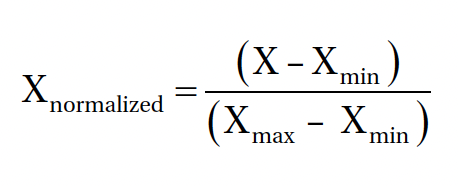

In [ ]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x1 = x_transform.copy()
x1 = x1[:,:-1]

x1[:, 5:] = mm.fit_transform(x1[:, 5:])

x1[0:5]

### Standard Scaler
StandardScaler sigue la Distribución Normal Estándar (SND). Por lo tanto, hace media = 0 y escala los datos a varianza unitaria.

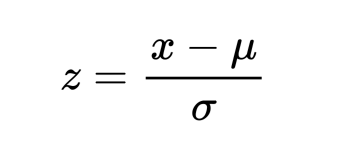

In [ ]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()

x2 = x_transform.copy()

x2 = x2[:,:-1]

x2[:, 5:] = sta.fit_transform(x2[:, 5:])

x2[0:5]

## Desbalanceo de clases


In [ ]:
# Identificación de ejemplos de entrenamiento por clases
df4['Purchased'].value_counts().plot(kind='bar')

In [ ]:
print(x1.shape)
print(y.shape)

## Submuestreo aleatorio con Imblearn

In [ ]:
# importar libreria
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42) 
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x1, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

In [ ]:
# importar libreria
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42) 
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x1, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

In [ ]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_ros, y_ros = ros.fit_resample(x1, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))